In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
%matplotlib inline

import missingno as msno

In [27]:
df = pd.read_csv('/content/drive/MyDrive/슬기로운 건강생활/data/health_data(BMI)_02.csv', encoding='cp949')
df

,성별,나이,신장,체중,bmi,BMI.1
0,0,40,165,60,22.0,0
1,1,60,150,65,28.9,3
2,1,50,155,55,22.9,0
3,0,60,160,70,27.3,2
4,1,50,155,50,20.8,0
...,...,...,...,...,...,...
987327,1,60,145,55,26.2,1
987328,1,50,160,55,21.5,0
987329,0,40,175,70,22.9,0
987330,1,40,160,70,27.3,2


In [28]:
df.columns

Index(['성별', '나이', '신장', '체중', 'bmi', 'BMI.1'], dtype='object')

In [54]:
# train = df.drop(['비만여부'], axis=1)

In [4]:
# # train_a = train.truncate(after='100',axis=0)

# train = df.drop(labels=range(100000, 987332), axis=0)

# train

,성별,나이,신장,체중,bmi,BMI.1
0,0,40,165,60,22.0,0
1,1,60,150,65,28.9,3
2,1,50,155,55,22.9,0
3,0,60,160,70,27.3,2
4,1,50,155,50,20.8,0
...,...,...,...,...,...,...
99995,0,40,175,70,22.9,0
99996,1,40,160,65,25.4,1
99997,1,60,150,55,24.4,0
99998,1,50,160,55,21.5,0


In [29]:
train = df

In [30]:
train.info

<bound method DataFrame.info of         성별  나이   신장  체중   bmi  BMI.1
0        0  40  165  60  22.0      0
1        1  60  150  65  28.9      3
2        1  50  155  55  22.9      0
3        0  60  160  70  27.3      2
4        1  50  155  50  20.8      0
...     ..  ..  ...  ..   ...    ...
987327   1  60  145  55  26.2      1
987328   1  50  160  55  21.5      0
987329   0  40  175  70  22.9      0
987330   1  40  160  70  27.3      2
987331   0  50  160  55  21.5      0

[987332 rows x 6 columns]>

In [31]:
# feature와 target 분리
yt=np.array(train['BMI.1'])
xt=train.drop(['BMI.1'], axis=1)
xt=np.array(xt)

# 데이터 정규화
scaler=MinMaxScaler()
xt=scaler.fit_transform(xt)

# train test 데이터 split
xtrain,xtest,ytrain,ytest=train_test_split(xt, yt, test_size=0.2, random_state=42)

# 2. 모델 훈련
## (1) 방법1

In [32]:
#로지스틱 회귀 알고리즘 불러오기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#모델 파라미터 조정(규제 파라미터 및 반복 학습 횟수)
lr = LogisticRegression() #C=20, max_iter=1000
lr.fit(xtrain, ytrain)

y_pred = lr.predict(xtest)

#모델 정확도 파악
print(lr.score(xtrain, ytrain))

# #샘플 5개로 예측해보기
# print(lr.predict(y_pred[:5]))

# #예측한 샘플 5개의 확률 알아보기
# proba = lr.predict_proba(y_pred[:5])


0.9944458863223462


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## (2) 방법2

In [11]:
# 오차행렬, 정확도, 정밀도, 재현율을 한번에 출력하기 위한 함수 정의

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(ytest, y_pred):
    confusion = confusion_matrix(ytest, y_pred)
    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{}, 정밀도:{}, 재현율:{}'.format(accuracy, precision, recall))

In [14]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

logisticmodel = logistic.fit(xtrain, ytrain)
y_pred = logistic.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# 3. 모델 성능 평가
- [로지스틱 회귀 분석 성능 평가](https://tpwkcorqhd.tistory.com/48)
- [다중 분류 모델 성능 평가 참고](https://moons08.github.io/datascience/classification_score_basic/)

In [33]:
# 정확도 구하기
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pred)

0.9939483559278259

In [16]:
# 조화 평균
from sklearn.metrics import f1_score
f1_score(ytest, y_pred)

ValueError: ignored

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [35]:
print(confusion_matrix(ytest, y_pred))

[[117314    124      0      0      0]
 [     0  32400    891      0      0]
 [     0     86  22976     86      0]
 [     0      0      0  13117      6]
 [     0      0      0      2  10465]]


In [36]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117438
           1       0.99      0.97      0.98     33291
           2       0.96      0.99      0.98     23148
           3       0.99      1.00      1.00     13123
           4       1.00      1.00      1.00     10467

    accuracy                           0.99    197467
   macro avg       0.99      0.99      0.99    197467
weighted avg       0.99      0.99      0.99    197467



# 시각화
## (1) 방법1

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
plt.scatter(X1[:, 0], X1[:, 1], marker='x', label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], marker='o', label='Class 2')
plt.scatter(X3[:, 0], X3[:, 1], marker='^', label='Class 3')
plt.grid(linestyle=':')
plt.legend()
plt.show()

## (2) 방법2

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0, flags=flags)


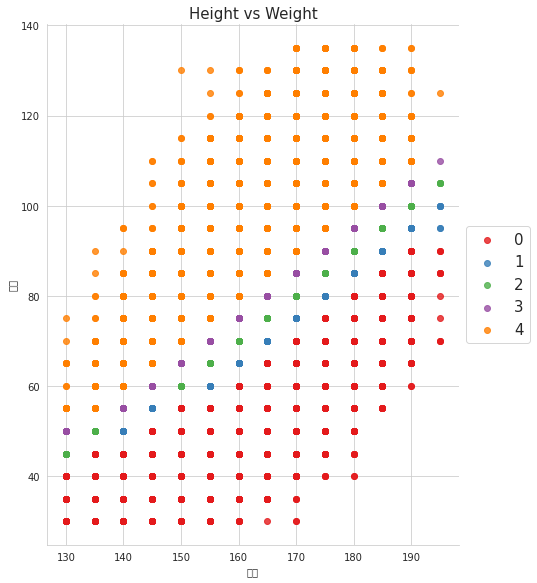

In [37]:
sns.set_style('whitegrid')

# colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
## http://colorbrewer2.org/#type=qualitative&scheme=Set2&n=6

# plt.scatter(x='Height',y='Weight',data=data_visual,c=data_visual['Index'],
#             cmap=matplotlib.colors.ListedColormap(colors))
# plt.colorbar()

## https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

sns.lmplot( x='신장', y='체중', data=train, 
           fit_reg=False, 
           hue='BMI.1', 
           legend=False, 
           palette='Set1',
           size = 8, 
           aspect = 1
          )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)

## https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})

### (3) 방법3
- [이거 해보기!!!](https://itstory1592.tistory.com/11)
![image.png](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FmeHSI%2Fbtq4YIVyuA6%2Fok5qngEkFjfKE9OG5XGOH0%2Fimg.png)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)


KeyError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0, flags=flags)


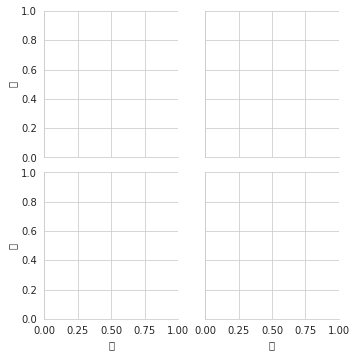

In [41]:
#데이터 개괄적 특징 파악
sns.pairplot(train, hue='BMI.1', vars='신장')

plt.show()

### (4) 방법4
- [로지스틱 다중 분류 시각화 참고](https://tpwkcorqhd.tistory.com/48)
- [make_classification](https://taeguu.tistory.com/15)  
- [개념 보기!](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)
# **=> 해석 불가능!^-^**

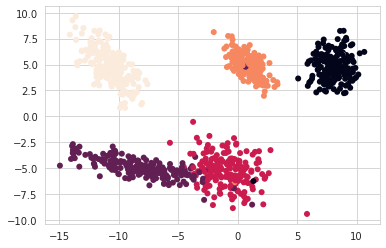

In [77]:
from sklearn.datasets import make_classification

xt, yt = make_classification(n_samples=1000, n_features=6, n_classes=5, n_informative=4, n_redundant=2, n_clusters_per_class=1, class_sep=5.0, random_state=101)
plt.scatter(xt[:,0], xt[:,1], marker='o', c=yt, linewidth=0, edgecolor=None)
plt. show()

# 로지스틱 회귀
- [code 참고1](https://blog.naver.com/PostView.naver?blogId=psycomaniac&logNo=222472359036)